In [ ]:
'''import os
import pandas as pd
from math import sqrt
import numpy as np

# Função para calcular a distância euclidiana entre dois pontos
def euclidean_distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Função para carregar os pontos do OpenFace
def load_openface_points(openface_file):
    openface_data = pd.read_csv(openface_file)

    # Verifica se as colunas possuem o formato esperado
    column_names = openface_data.columns
    print(f"Colunas detectadas: {column_names}")  # Adicionado para inspecionar as colunas

    # Tenta detectar a estrutura correta das colunas para X e Y
    points_x = [col for col in column_names if col.startswith('x_')]
    points_y = [col for col in column_names if col.startswith('y_')]

    if len(points_x) != 68 or len(points_y) != 68:
        raise ValueError(f"Número de pontos esperado (68) não encontrado no arquivo {openface_file}")

    points_x_values = openface_data[points_x].values[0]
    points_y_values = openface_data[points_y].values[0]

    return list(zip(points_x_values, points_y_values))

# Função para carregar os pontos do iBUG
def load_ibug_points(ibug_file):
    points = []
    with open(ibug_file, 'r') as f:
        for line in f:
            x, y = map(float, line.split())
            points.append((x, y))
    return points

# Função principal para comparar os pontos entre OpenFace e iBUG
def compare_points(openface_dir, ibug_dir, output_file):
    differences_summary = []

    # Iterar sobre todos os arquivos OpenFace
    for openface_file in sorted(os.listdir(openface_dir)):
        if openface_file.endswith('.csv'):
            # Nome correspondente do arquivo iBUG
            image_num = openface_file.split('_')[1]  # Extraí o número da imagem (ex: '003' de 'image_003_1.csv')
            ibug_file = f'image_{image_num}.pts'  # Assumindo que o arquivo iBUG tem esse padrão de nome

            openface_path = os.path.join(openface_dir, openface_file)
            ibug_path = os.path.join(ibug_dir, ibug_file)

            # Se o arquivo iBUG correspondente não existir, pula para o próximo
            if not os.path.exists(ibug_path):
                print(f"Arquivo iBUG não encontrado para {openface_file}, pulando...")
                continue

            # Carregar os pontos
            openface_points = load_openface_points(openface_path)
            ibug_points = load_ibug_points(ibug_path)

            # Verificar se há 68 pontos em ambos
            if len(openface_points) != 68 or len(ibug_points) != 68:
                print(f"Erro: Número de pontos não corresponde para {openface_file}")
                continue

            # Calcular as diferenças
            differences = [euclidean_distance(p1, p2) for p1, p2 in zip(openface_points, ibug_points)]

            # Salvar a média e desvio padrão das diferenças
            mean_diff = np.mean(differences)
            std_diff = np.std(differences)
            differences_summary.append((openface_file, mean_diff, std_diff))

            print(f"Comparação concluída para {openface_file}: Média={mean_diff}, Desvio Padrão={std_diff}")

    # Salvar os resultados em um arquivo de saída
    results_df = pd.DataFrame(differences_summary, columns=['Image', 'Mean Difference', 'Std Difference'])
    results_df.to_csv(output_file, index=False)
    print(f"Resultados salvos em {output_file}")

# Defina os diretórios dos arquivos OpenFace e iBUG
openface_dir = '/home/carlosguttemberg/Downloads/ibug/processed'  # Ajuste o caminho para seus arquivos OpenFace
ibug_dir = '/home/carlosguttemberg/Downloads/ibug/'  # Ajuste o caminho para os arquivos de anotações do iBUG

# Arquivo de saída para os resultados
output_file = 'comparison_results.csv'

# Executar a comparação
compare_points(openface_dir, ibug_dir, output_file)'''

'''import os
import pandas as pd
from math import sqrt
import numpy as np

# Função para calcular a distância euclidiana entre dois pontos
def euclidean_distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Função para carregar os pontos do OpenFace
def load_openface_points(openface_file):
    openface_data = pd.read_csv(openface_file)

    # Verifica se as colunas possuem o formato esperado
    column_names = openface_data.columns
    print(f"Colunas detectadas: {column_names}")

    # Detectar colunas para X e Y
    points_x = [col for col in column_names if col.startswith(' x_')]
    points_y = [col for col in column_names if col.startswith(' y_')]

    if len(points_x) != 68 or len(points_y) != 68:
        raise ValueError(f"Número de pontos esperado (68) não encontrado no arquivo {openface_file}")

    points_x_values = openface_data[points_x].values[0]
    points_y_values = openface_data[points_y].values[0]

    return list(zip(points_x_values, points_y_values))

# Função para carregar os pontos do iBUG
def load_ibug_points(ibug_file):
    points = []
    with open(ibug_file, 'r') as f:
        for line in f:
            # Pular linhas não numéricas (como metadados)
            if line.strip().startswith('version') or line.strip().startswith('{') or line.strip().startswith('}'):
                continue
            x, y = map(float, line.split())
            points.append((x, y))
    return points

# Função principal para comparar os pontos entre OpenFace e iBUG
def compare_points(openface_dir, ibug_dir, output_file):
    differences_summary = []

    # Iterar sobre todos os arquivos OpenFace
    for openface_file in sorted(os.listdir(openface_dir)):
        if openface_file.endswith('.csv'):
            # Nome correspondente do arquivo iBUG
            image_num = openface_file.split('_')[1]  # Extraí o número da imagem (ex: '003' de 'image_003_1.csv')
            ibug_file = f'image_{image_num}.pts'  # Assumindo que o arquivo iBUG tem esse padrão de nome

            openface_path = os.path.join(openface_dir, openface_file)
            ibug_path = os.path.join(ibug_dir, ibug_file)

            # Se o arquivo iBUG correspondente não existir, pula para o próximo
            if not os.path.exists(ibug_path):
                print(f"Arquivo iBUG não encontrado para {openface_file}, pulando...")
                continue

            # Carregar os pontos
            try:
                openface_points = load_openface_points(openface_path)
                ibug_points = load_ibug_points(ibug_path)
            except Exception as e:
                print(f"Erro ao carregar pontos para {openface_file}: {e}")
                continue

            # Verificar se há 68 pontos em ambos
            if len(openface_points) != 68 or len(ibug_points) != 68:
                print(f"Erro: Número de pontos não corresponde para {openface_file}")
                continue

            # Calcular as diferenças
            differences = [euclidean_distance(p1, p2) for p1, p2 in zip(openface_points, ibug_points)]

            # Salvar a média e desvio padrão das diferenças
            mean_diff = np.mean(differences)
            std_diff = np.std(differences)
            differences_summary.append((openface_file, mean_diff, std_diff))

            print(f"Comparação concluída para {openface_file}: Média={mean_diff}, Desvio Padrão={std_diff}")

    # Salvar os resultados em um arquivo de saída
    results_df = pd.DataFrame(differences_summary, columns=['Image', 'Mean Difference', 'Std Difference'])
    results_df.to_csv(output_file, index=False)
    print(f"Resultados salvos em {output_file}")

# Defina os diretórios dos arquivos OpenFace e iBUG
openface_dir = '/home/carlosguttemberg/Downloads/ibug/processed'  # Ajuste o caminho para seus arquivos OpenFace
ibug_dir = '/home/carlosguttemberg/Downloads/ibug/'  # Ajuste o caminho para os arquivos de anotações do iBUG

# Arquivo de saída para os resultados
output_file = 'comparison_results.csv'

# Executar a comparação
compare_points(openface_dir, ibug_dir, output_file)'''


In [15]:
import pandas as pd
import os

# Diretório onde estão os arquivos CSV
input_dir = '/home/carlosguttemberg/Downloads/Eu-001/processed'
output_dir = '/home/carlosguttemberg/Downloads/Eu-001/processed_filtered'

# Certifique-se de que o diretório de saída existe
os.makedirs(output_dir, exist_ok=True)

# Colunas que queremos manter
columns_to_keep = [f'x_{i}' for i in range(68)] + [f'y_{i}' for i in range(68)]

# Processa cada arquivo CSV no diretório
for file_name in os.listdir(input_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_csv(file_path)

        # Filtra as colunas desejadas
        filtered_df = df[columns_to_keep]

        # Salva o arquivo filtrado no diretório de saída
        output_file_path = os.path.join(output_dir, file_name)
        filtered_df.to_csv(output_file_path, index=False)

print('Arquivos CSV filtrados com sucesso!')


Arquivos CSV filtrados com sucesso!


In [16]:
import pandas as pd
import os

# Diretório onde estão os arquivos CSV
input_dir = '/home/carlosguttemberg/Downloads/Eu-001/processed_filtered'
output_dir = '/home/carlosguttemberg/Downloads/Eu-001/filtered_combined'

# Certifique-se de que o diretório de saída existe
os.makedirs(output_dir, exist_ok=True)

# Processa cada arquivo CSV no diretório
for file_name in os.listdir(input_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_csv(file_path)

        # Obtém as colunas de x e y
        x_columns = [f'x_{i}' for i in range(68)]
        y_columns = [f'y_{i}' for i in range(68)]

        # Cria uma nova coluna com todos os valores x concatenados
        df['x_values'] = df[x_columns].apply(lambda row: ','.join(map(str, row)), axis=1)

        # Cria uma nova coluna com todos os valores y concatenados
        df['y_values'] = df[y_columns].apply(lambda row: ','.join(map(str, row)), axis=1)

        # Mantém apenas as novas colunas
        combined_df = df[['x_values', 'y_values']]

        # Salva o arquivo combinado no diretório de saída
        output_file_path = os.path.join(output_dir, file_name)
        combined_df.to_csv(output_file_path, index=False)

print('Arquivos CSV combinados com sucesso!')


Arquivos CSV combinados com sucesso!


In [17]:
import pandas as pd
import os

# Diretório onde estão os arquivos CSV
input_dir = '/home/carlosguttemberg/Downloads/Eu-001/processed_filtered'
output_dir = '/home/carlosguttemberg/Downloads/Eu-001/long_format'

# Certifique-se de que o diretório de saída existe
os.makedirs(output_dir, exist_ok=True)

# Processa cada arquivo CSV no diretório
for file_name in os.listdir(input_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_csv(file_path)

        # Obtém as colunas de x e y
        x_columns = [f'x_{i}' for i in range(68)]
        y_columns = [f'y_{i}' for i in range(68)]

        # Cria listas para armazenar os pares de valores x e y
        x_values = []
        y_values = []

        # Itera sobre as linhas do DataFrame
        for _, row in df.iterrows():
            for i in range(68):
                x_values.append(row[x_columns[i]])
                y_values.append(row[y_columns[i]])

        # Cria um novo DataFrame com os valores x e y
        long_format_df = pd.DataFrame({
            'x': x_values,
            'y': y_values
        })

        # Salva o arquivo no diretório de saída
        output_file_path = os.path.join(output_dir, file_name)
        long_format_df.to_csv(output_file_path, index=False)

print('Arquivos CSV transformados com sucesso!')


Arquivos CSV transformados com sucesso!


In [5]:
import pandas as pd
import os

# Diretório onde estão os arquivos .pts
input_dir = '/home/carlosguttemberg/Downloads/300W/Fotos'
output_dir = '/home/carlosguttemberg/Downloads/300W/Fotos'

# Certifique-se de que o diretório de saída existe
os.makedirs(output_dir, exist_ok=True)

def pts_to_csv(pts_file_path, csv_file_path):
    with open(pts_file_path, 'r') as file:
        lines = file.readlines()

    # Encontrar a linha com as coordenadas (dentro das chaves {})
    inside_braces = False
    x_values = []
    y_values = []

    for line in lines:
        line = line.strip()
        if line == '{':
            inside_braces = True
            continue
        elif line == '}':
            inside_braces = False
            break

        if inside_braces:
            parts = line.split()
            x_values.append(parts[0])
            y_values.append(parts[1])

    # Criar DataFrame e salvar em CSV
    df = pd.DataFrame({
        'x': x_values,
        'y': y_values
    })
    df.to_csv(csv_file_path, index=False)

# Processa cada arquivo .pts no diretório
for file_name in os.listdir(input_dir):
    if file_name.endswith('.pts'):
        pts_file_path = os.path.join(input_dir, file_name)
        csv_file_name = file_name.replace('.pts', '.csv')
        csv_file_path = os.path.join(output_dir, csv_file_name)
        
        pts_to_csv(pts_file_path, csv_file_path)

print('Arquivos .pts convertidos para CSV com sucesso!')


Arquivos .pts convertidos para CSV com sucesso!


In [ ]:
'''import pandas as pd
import numpy as np
import os

# Diretórios com os arquivos CSV
long_format_dir = '/home/carlosguttemberg/Downloads/afw/long_format'
ibug_dir = '/home/carlosguttemberg/Downloads/afw'

# Diretório para salvar os resultados
results_dir = '/home/carlosguttemberg/Downloads/afw/results'
os.makedirs(results_dir, exist_ok=True)

def calculate_errors(long_format_file, ibug_file):
    long_format_df = pd.read_csv(long_format_file)
    ibug_df = pd.read_csv(ibug_file)

    # Verifica se o número de linhas é o mesmo
    if long_format_df.shape[0] != ibug_df.shape[0]:
        print(f"Files {long_format_file} and {ibug_file} have different number of rows. Skipping this comparison.")
    continue
    
    # Calcula as diferenças
    differences = np.sqrt((long_format_df['x'] - ibug_df['x'])**2 + (long_format_df['y'] - ibug_df['y'])**2)
    
    # Calcula o erro médio e o desvio padrão
    mean_error = np.mean(differences)
    std_dev_error = np.std(differences)
    
    return mean_error, std_dev_error

# Processa cada arquivo CSV
for file_name in os.listdir(long_format_dir):
    if file_name.endswith('.csv'):
        long_format_file = os.path.join(long_format_dir, file_name)
        ibug_file = os.path.join(ibug_dir, file_name)

        if os.path.exists(ibug_file):
            mean_error, std_dev_error = calculate_errors(long_format_file, ibug_file)
            results_file = os.path.join(results_dir, file_name.replace('.csv', '_results.txt'))

            with open(results_file, 'w') as f:
                f.write(f'Mean Error: {mean_error:.6f}\n')
                f.write(f'Standard Deviation: {std_dev_error:.6f}\n')
        else:
            print(f'Arquivo correspondente em {ibug_dir} não encontrado para {file_name}')

print('Cálculo de erros concluído!')
'''

In [11]:
import pandas as pd
import numpy as np
import os

# Diretórios com os arquivos CSV
long_format_dir = '/home/carlosguttemberg/OpenFace/300W/300W/long_format'
ibug_dir = '/home/carlosguttemberg/Downloads/300W/Fotos'

# Diretório para salvar os resultados
results_dir = '/home/carlosguttemberg/OpenFace/300W/results'
os.makedirs(results_dir, exist_ok=True)

def calculate_errors(long_format_file, ibug_file):
    long_format_df = pd.read_csv(long_format_file)
    ibug_df = pd.read_csv(ibug_file)

    # Verifica se o número de linhas é o mesmo
    if long_format_df.shape[0] != ibug_df.shape[0]:
        print(f"Files {long_format_file} and {ibug_file} have different number of rows. Skipping this comparison.")
        return None, None
    
    # Calcula as diferenças
    differences = np.sqrt((long_format_df['x'] - ibug_df['x'])**2 + (long_format_df['y'] - ibug_df['y'])**2)
    
    # Calcula o erro médio e o desvio padrão
    mean_error = np.mean(differences)
    std_dev_error = np.std(differences)
    
    return mean_error, std_dev_error

# Processa cada arquivo CSV
for file_name in os.listdir(long_format_dir):
    if file_name.endswith('.csv'):
        long_format_file = os.path.join(long_format_dir, file_name)
        ibug_file = os.path.join(ibug_dir, file_name)

        if os.path.exists(ibug_file):
            mean_error, std_dev_error = calculate_errors(long_format_file, ibug_file)
            if mean_error is not None and std_dev_error is not None:
                results_file = os.path.join(results_dir, file_name.replace('.csv', '_results.txt'))

                with open(results_file, 'w') as f:
                    f.write(f'Mean Error: {mean_error:.6f}\n')
                    f.write(f'Standard Deviation: {std_dev_error:.6f}\n')
        else:
            print(f'Arquivo correspondente em {ibug_dir} não encontrado para {file_name}')

print('Cálculo de erros concluído!')

Arquivo correspondente em /home/carlosguttemberg/Downloads/300W/Fotos não encontrado para dados_concatenados.csv
Cálculo de erros concluído!


In [ ]:
'''import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caminho para os diretórios
dir_csv = '/home/carlosguttemberg/Downloads/ibug/long_format'
dir_pts = '/home/carlosguttemberg/Downloads/ibug'

# Listar arquivos CSV e PTS
csv_files = [f for f in os.listdir(dir_csv) if f.endswith('.csv')]
pts_files = [f for f in os.listdir(dir_pts) if f.endswith('.pts')]

# Função para ler arquivos PTS e convertê-los em DataFrame
def pts_to_df(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_points = int(lines[1].strip().split(':')[1])
        data = [line.strip().split() for line in lines[3:] if line.strip() and not line.strip().startswith('}')]
        df = pd.DataFrame(data, columns=['x', 'y']).astype(float)
    return df

# Função para calcular erro médio e desvio padrão
def calculate_errors(csv_df, pts_df):
    # Verificar se o número de linhas é igual
    if len(csv_df) != len(pts_df):
        print(f"File lengths do not match: {csv_file}")
        return None
    
    # Calcular diferenças
    x_diff = csv_df['x'] - pts_df['x']
    y_diff = csv_df['y'] - pts_df['y']
    
    # Erro médio
    rms_error = np.sqrt(np.mean(x_diff**2 + y_diff**2))
    
    # Número de pontos
    num_points = len(csv_df)
    
    # Erro RMS normalizado
    normalized_rms_error = rms_error / num_points
    
    return normalized_rms_error

# Comparar arquivos CSV e PTS
errors = []
for csv_file in csv_files:
    # Correspondente arquivo PTS
    pts_file = csv_file.replace('.csv', '.pts')
    if pts_file in pts_files:
        csv_path = os.path.join(dir_csv, csv_file)
        pts_path = os.path.join(dir_pts, pts_file)
        
        # Ler arquivos
        csv_df = pd.read_csv(csv_path)
        pts_df = pts_to_df(pts_path)
        
        # Calcular erro RMS normalizado
        normalized_rms_error = calculate_errors(csv_df, pts_df)
        
        if normalized_rms_error is not None:
            errors.append(normalized_rms_error)

# Remover valores None
errors = [e for e in errors if e is not None]

# Criar DataFrame para erros
errors_df = pd.DataFrame(errors, columns=['Normalized RMS Error'])

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.hist(errors_df['Normalized RMS Error'], bins=20, edgecolor='black')
plt.title('Distribuição do Erro RMS Normalizado')
plt.xlabel('Erro RMS Normalizado')
plt.ylabel('Número de Imagens')
plt.grid(True)
plt.savefig('/home/carlosguttemberg/Downloads/ibug/rms_error_distribution.png')
plt.show()
print("Gráfico salvo em /home/carlosguttemberg/Downloads/ibug/rms_error_distribution.png")'''

'''import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caminho para os diretórios
dir_csv = '/home/carlosguttemberg/Downloads/ibug/long_format'
dir_pts = '/home/carlosguttemberg/Downloads/ibug'

# Listar arquivos CSV e PTS
csv_files = [f for f in os.listdir(dir_csv) if f.endswith('.csv')]
pts_files = [f for f in os.listdir(dir_pts) if f.endswith('.pts')]

# Função para ler arquivos PTS e convertê-los em DataFrame
def pts_to_df(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_points = int(lines[1].strip().split(':')[1])
        data = [line.strip().split() for line in lines[3:] if line.strip() and not line.strip().startswith('}')]
        df = pd.DataFrame(data, columns=['x', 'y']).astype(float)
    return df

# Função para calcular erro médio e desvio padrão
def calculate_errors(csv_df, pts_df):
    # Verificar se o número de linhas é igual
    if len(csv_df) != len(pts_df):
        return None, f"File lengths do not match: {csv_file}"
    
    # Calcular diferenças
    x_diff = csv_df['x'] - pts_df['x']
    y_diff = csv_df['y'] - pts_df['y']
    
    # Erro médio
    rms_error = np.sqrt(np.mean(x_diff**2 + y_diff**2))
    
    # Número de pontos
    num_points = len(csv_df)
    
    # Erro RMS normalizado
    normalized_rms_error = rms_error / num_points
    
    return normalized_rms_error, None

# Comparar arquivos CSV e PTS
errors = []
error_messages = []
for csv_file in csv_files:
    # Correspondente arquivo PTS
    pts_file = csv_file.replace('.csv', '.pts')
    if pts_file in pts_files:
        csv_path = os.path.join(dir_csv, csv_file)
        pts_path = os.path.join(dir_pts, pts_file)
        
        # Ler arquivos
        csv_df = pd.read_csv(csv_path)
        pts_df = pts_to_df(pts_path)
        
        # Calcular erro RMS normalizado
        normalized_rms_error, error_message = calculate_errors(csv_df, pts_df)
        
        if normalized_rms_error is not None:
            errors.append(normalized_rms_error)
        if error_message:
            error_messages.append(error_message)

# Remover valores None
errors = [e for e in errors if e is not None]

# Criar DataFrame para erros
errors_df = pd.DataFrame(errors, columns=['Normalized RMS Error'])

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.hist(errors_df['Normalized RMS Error'], bins=20, edgecolor='black')
plt.title('Distribuição do Erro RMS Normalizado')
plt.xlabel('Erro RMS Normalizado')
plt.ylabel('Número de Imagens')
plt.grid(True)
plt.savefig('/home/carlosguttemberg/Downloads/ibug/rms_error_distribution.png')
plt.show()
print("Gráfico salvo em /home/carlosguttemberg/Downloads/ibug/rms_error_distribution.png")

# Imprimir mensagens de erro
if error_messages:
    with open('/home/carlosguttemberg/Downloads/ibug/error_log.txt', 'w') as f:
        for message in error_messages:
            f.write(f"{message}\n")
    print("Mensagens de erro salvas em /home/carlosguttemberg/Downloads/ibug/error_log.txt")
'''

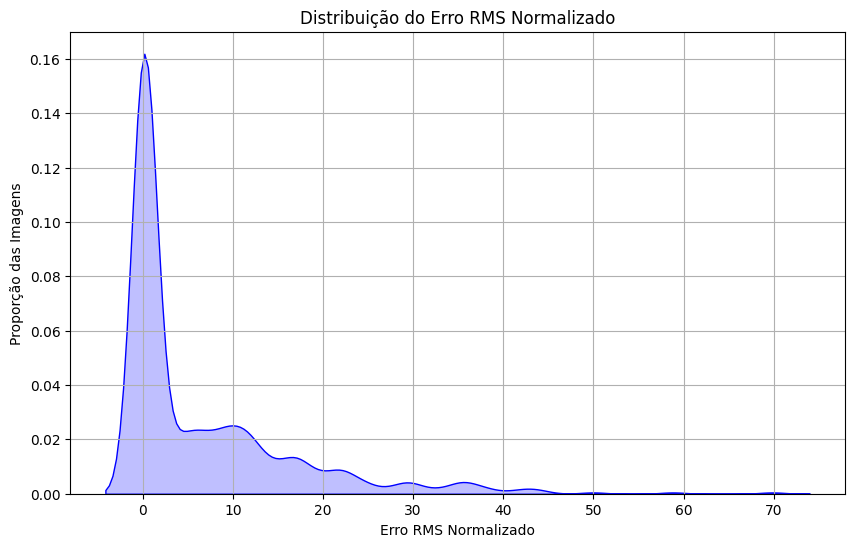

Gráfico KDE salvo em /home/carlosguttemberg/OpenFace/300W/Anotados/rms_error_distribution_kde.png


In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Usado para KDE

# Caminho para os diretórios
dir_csv = '/home/carlosguttemberg/OpenFace/300W/300W/long_format'
dir_pts = '/home/carlosguttemberg/Downloads/300W/Fotos'

# Listar arquivos CSV e PTS
csv_files = [f for f in os.listdir(dir_csv) if f.endswith('.csv')]
pts_files = [f for f in os.listdir(dir_pts) if f.endswith('.pts')]

# Função para ler arquivos PTS e convertê-los em DataFrame
def pts_to_df(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_points = int(lines[1].strip().split(':')[1])
        data = [line.strip().split() for line in lines[3:] if line.strip() and not line.strip().startswith('}')]
        df = pd.DataFrame(data, columns=['x', 'y']).astype(float)
    return df

# Função para calcular erro médio e desvio padrão
def calculate_errors(csv_df, pts_df):
    # Verificar se o número de linhas é igual
    if len(csv_df) != len(pts_df):
        return None, f"File lengths do not match: {csv_file}"
    
    # Calcular diferenças
    x_diff = csv_df['x'] - pts_df['x']
    y_diff = csv_df['y'] - pts_df['y']
    
    # Erro médio
    rms_error = np.sqrt(np.mean(x_diff**2 + y_diff**2))
    
    # Número de pontos
    num_points = len(csv_df)
    
    # Erro RMS normalizado
    normalized_rms_error = rms_error / num_points
    
    return normalized_rms_error, None

# Comparar arquivos CSV e PTS
errors = []
error_messages = []
for csv_file in csv_files:
    # Correspondente arquivo PTS
    pts_file = csv_file.replace('.csv', '.pts')
    if pts_file in pts_files:
        csv_path = os.path.join(dir_csv, csv_file)
        pts_path = os.path.join(dir_pts, pts_file)
        
        # Ler arquivos
        csv_df = pd.read_csv(csv_path)
        pts_df = pts_to_df(pts_path)
        
        # Calcular erro RMS normalizado
        normalized_rms_error, error_message = calculate_errors(csv_df, pts_df)
        
        if normalized_rms_error is not None:
            errors.append(normalized_rms_error)
        if error_message:
            error_messages.append(error_message)

# Remover valores None
errors = [e for e in errors if e is not None]

# Criar DataFrame para erros
errors_df = pd.DataFrame(errors, columns=['Normalized RMS Error'])

# Plotar o gráfico KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(errors_df['Normalized RMS Error'], bw_adjust=0.5, fill=True, color='blue')
plt.title('Distribuição do Erro RMS Normalizado')
plt.xlabel('Erro RMS Normalizado')
plt.ylabel('Proporção das Imagens')
plt.grid(True)
plt.savefig('/home/carlosguttemberg/OpenFace/300W/Anotados/rms_error_distribution_kde.png')
plt.show()
print("Gráfico KDE salvo em /home/carlosguttemberg/OpenFace/300W/Anotados/rms_error_distribution_kde.png")

# Imprimir mensagens de erro
if error_messages:
    with open('/home/carlosguttemberg/OpenFace/300W/Anotados/error_log.txt', 'w') as f:
        for message in error_messages:
            f.write(f"{message}\n")
    print("Mensagens de erro salvas em /home/carlosguttemberg/OpenFace/300W/Anotados/error_log.txt")


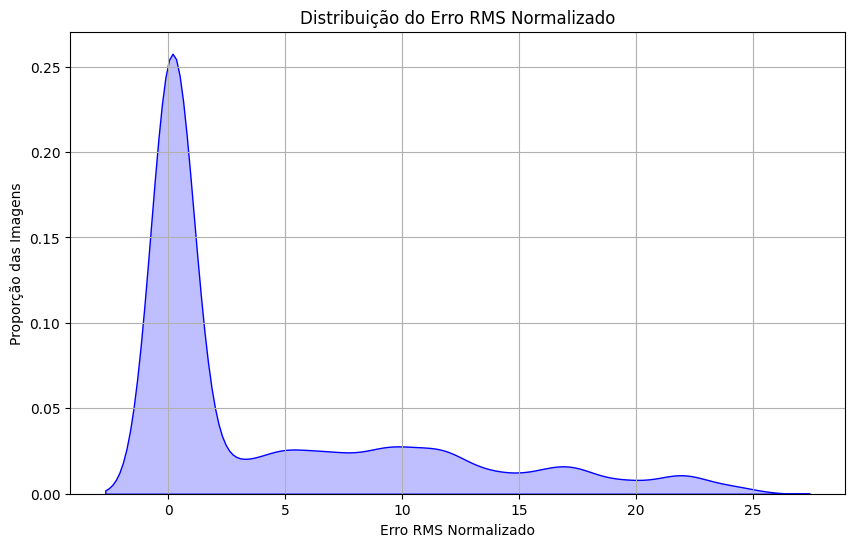

Gráfico KDE com outliers removidos salvo em /home/carlosguttemberg/OpenFace/300W/Anotados/rms_error_distribution_kde_filtered.png


In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Usado para KDE

# Caminho para os diretórios
dir_csv = '//home/carlosguttemberg/OpenFace/300W/300W/long_format'
dir_pts = '/home/carlosguttemberg/Downloads/300W/Fotos'

# Listar arquivos CSV e PTS
csv_files = [f for f in os.listdir(dir_csv) if f.endswith('.csv')]
pts_files = [f for f in os.listdir(dir_pts) if f.endswith('.pts')]

# Função para ler arquivos PTS e convertê-los em DataFrame
def pts_to_df(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_points = int(lines[1].strip().split(':')[1])
        data = [line.strip().split() for line in lines[3:] if line.strip() and not line.strip().startswith('}')]
        df = pd.DataFrame(data, columns=['x', 'y']).astype(float)
    return df

# Função para calcular erro médio e desvio padrão
def calculate_errors(csv_df, pts_df):
    # Verificar se o número de linhas é igual
    if len(csv_df) != len(pts_df):
        return None, f"File lengths do not match: {csv_file}"
    
    # Calcular diferenças
    x_diff = csv_df['x'] - pts_df['x']
    y_diff = csv_df['y'] - pts_df['y']
    
    # Erro médio
    rms_error = np.sqrt(np.mean(x_diff**2 + y_diff**2))
    
    # Número de pontos
    num_points = len(csv_df)
    
    # Erro RMS normalizado
    normalized_rms_error = rms_error / num_points
    
    return normalized_rms_error, None

# Comparar arquivos CSV e PTS
errors = []
error_messages = []
for csv_file in csv_files:
    # Correspondente arquivo PTS
    pts_file = csv_file.replace('.csv', '.pts')
    if pts_file in pts_files:
        csv_path = os.path.join(dir_csv, csv_file)
        pts_path = os.path.join(dir_pts, pts_file)
        
        # Ler arquivos
        csv_df = pd.read_csv(csv_path)
        pts_df = pts_to_df(pts_path)
        
        # Calcular erro RMS normalizado
        normalized_rms_error, error_message = calculate_errors(csv_df, pts_df)
        
        if normalized_rms_error is not None:
            errors.append(normalized_rms_error)
        if error_message:
            error_messages.append(error_message)

# Remover valores None
errors = [e for e in errors if e is not None]

# Criar DataFrame para erros
errors_df = pd.DataFrame(errors, columns=['Normalized RMS Error'])

# Remover outliers usando o IQR
Q1 = errors_df['Normalized RMS Error'].quantile(0.25)
Q3 = errors_df['Normalized RMS Error'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar erros dentro do intervalo interquartil
filtered_errors = errors_df[(errors_df['Normalized RMS Error'] >= lower_bound) &
                            (errors_df['Normalized RMS Error'] <= upper_bound)]

# Plotar o gráfico KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_errors['Normalized RMS Error'], bw_adjust=0.5, fill=True, color='blue')
plt.title('Distribuição do Erro RMS Normalizado')
plt.xlabel('Erro RMS Normalizado')
plt.ylabel('Proporção das Imagens')
plt.grid(True)
plt.savefig('/home/carlosguttemberg/OpenFace/300W/Anotados/rms_error_distribution_kde_filtered.png')
plt.show()
print("Gráfico KDE com outliers removidos salvo em /home/carlosguttemberg/OpenFace/300W/Anotados/rms_error_distribution_kde_filtered.png")

# Imprimir mensagens de erro
if error_messages:
    with open('/home/carlosguttemberg/OpenFace/300W/Anotados/error_log.txt', 'w') as f:
        for message in error_messages:
            f.write(f"{message}\n")
    print("Mensagens de erro salvas em /home/carlosguttemberg/OpenFace/300W/Anotados/error_log.txt")


In [14]:
import os
import pandas as pd
import numpy as np

# Caminho para o diretório de resultados
results_dir = '/home/carlosguttemberg/OpenFace/300W/results'

# Listar arquivos de resultados
result_files = [f for f in os.listdir(results_dir) if f.endswith('.txt')]

# Função para extrair o erro médio a partir de um arquivo de texto
def extract_mean_error(file_path):
    try:
        with open(file_path, 'r') as file:
            # Ler todas as linhas do arquivo
            lines = file.readlines()
            
            # Encontrar a linha que começa com 'Mean Error:'
            for line in lines:
                if line.startswith('Mean Error:'):
                    # Extrair o valor numérico
                    mean_error = float(line.split(':')[1].strip())
                    return mean_error
            return None
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Calcular erros médios
mean_errors = []
error_messages = []
for result_file in result_files:
    result_path = os.path.join(results_dir, result_file)
    
    # Calcular o erro médio para o arquivo
    mean_error = extract_mean_error(result_path)
    
    if mean_error is not None:
        mean_errors.append(mean_error)
    else:
        error_messages.append(f"Failed to extract mean error for {result_file}")

# Criar DataFrame para erros médios
mean_errors_df = pd.DataFrame(mean_errors, columns=['Mean Error'])

# Exibir erro médio geral
if mean_errors:
    overall_mean_error = np.mean(mean_errors)
    print(f"Erro médio geral: {overall_mean_error:.4f}")

# Salvar erros médios em um arquivo CSV
mean_errors_df.to_csv('/home/carlosguttemberg/OpenFace/300W/Anotados/mean_errors.csv', index=False)
print("Erros médios salvos em /home/carlosguttemberg/OpenFace/300W/Anotados/mean_errors.csv")

# Imprimir mensagens de erro
if error_messages:
    with open('/home/carlosguttemberg/OpenFace/300W/Anotados/error_log.txt', 'a') as f:
        for message in error_messages:
            f.write(f"{message}\n")
    print("Mensagens de erro adicionadas a /home/carlosguttemberg/OpenFace/300W/Anotados/error_log.txt")


Erro médio geral: 435.7920
Erros médios salvos em /home/carlosguttemberg/OpenFace/300W/Anotados/mean_errors.csv
